# Defining Surfaces in FlatSurf

Initial version by Pat Hooper <whooper@ccny.cuny.edu>, Dec 16, 2017.

In [1]:
from flatsurf import *

## Built in surfaces

Veech's double n-gon surfaces:

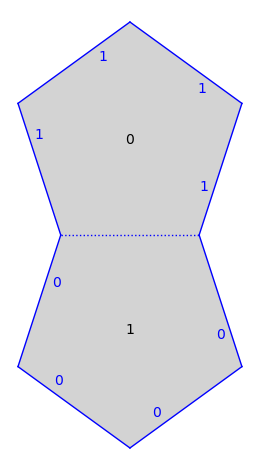

In [2]:
s = translation_surfaces.veech_double_n_gon(5)
s.plot()

The Arnoux-Yoccoz surface of arbitrary genus is built in:

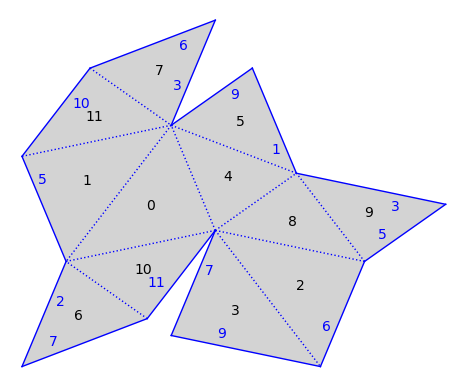

In [3]:
s=translation_surfaces.arnoux_yoccoz(3)
s.plot()

Chamanara's infinite translation surface:

In [4]:
s=translation_surfaces.chamanara(1/2)

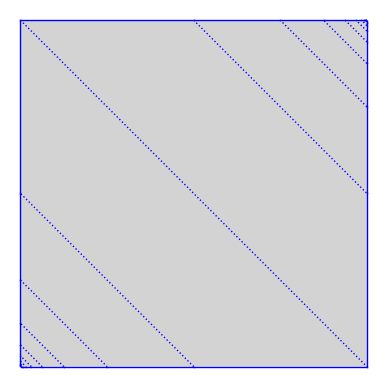

In [5]:
s.plot(polygon_labels=False,edge_labels=False)

In [6]:
s=translation_surfaces.infinite_staircase()

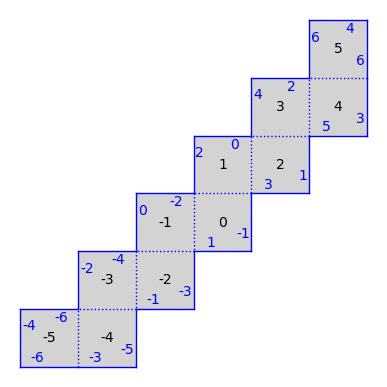

In [7]:
s.plot()

## Billiard tables

In [8]:
s=similarity_surfaces.billiard(polygons(vertices=[(0,0), (3,0), (0,4)]))

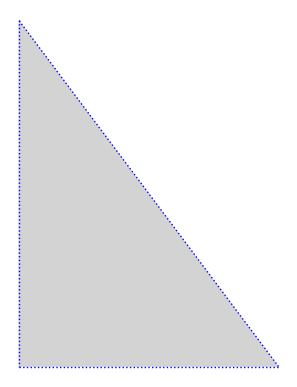

In [9]:
s.plot()

## Minimal translation surface covers

Continuing the billiard example above, we get an infinite translation surface below:

In [10]:
ss = s.minimal_cover(cover_type="translation").copy(relabel=True)

In [11]:
gs = ss.graphical_surface()

In [12]:
gs.make_all_visible(limit=12)

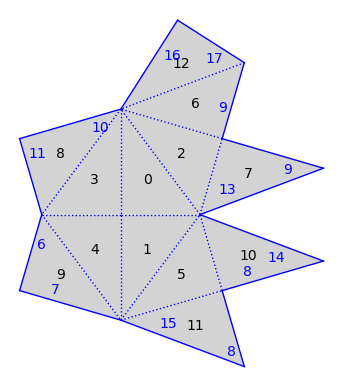

In [13]:
gs.plot()

## Building surfaces from polygons

This defines a regular 12-gon with algebraic real coordinates (AA) with first vector given by (1,0):

In [14]:
p0 = polygons.regular_ngon(12,field=AA)
p1 = polygons.regular_ngon(3,field=AA)

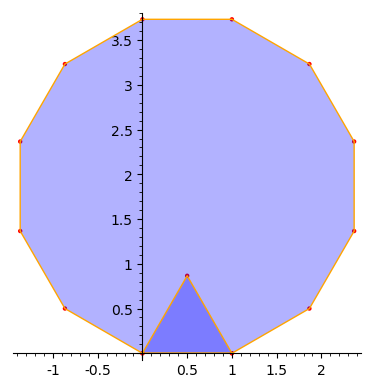

In [15]:
p0.plot()+p1.plot()

The vertices of n-gons are numbered by $\{0,...,n-1\}$, with the $0$-th vertex at the origin. Edge $i$ joins vertex $i$ to vertex $i+1 \pmod{n}$.

We can act on polygon with $2 \times 2$ matrices. We define the rotation by $\frac{\pi}{6}$ below:

In [16]:
R = matrix(AA,[[cos(pi/6),-sin(pi/6)],[sin(pi/6),cos(pi/6)]])
show(R)

[0.866025403784439?               -1/2]
[               1/2 0.866025403784439?]

In [17]:
R*p1

Polygon: (0, 0), (0.866025403784439?, 1/2), (0, 1)

Define a surface over the field <code>AA</code> of algebraic reals.

In [18]:
surface = Surface_dict(base_ring=AA)

Add two polygons to the surface with labels 0 and 1:

In [19]:
surface.add_polygon(p0,label=0)

0

In [20]:
surface.add_polygon(p1,label=1)

1

Set the "base label" for the surface. This is just a choice of a favorite polygon label.

In [21]:
surface.change_base_label(0)

Glue the edges of polygon 0 to the parallel edges of polygon 1.

In [22]:
surface.change_edge_gluing(0,6,1,0)
surface.change_edge_gluing(0,10,1,1)
surface.change_edge_gluing(0,2,1,2)

Add three more rotated triangles and glue them appropriately.

In [23]:
for i in range(1,4):
    surface.add_polygon((R**i)*p1,label=i+1)
    surface.change_edge_gluing(0,6+i,i+1,0)
    surface.change_edge_gluing(0,(10+i)%12,i+1,1)
    surface.change_edge_gluing(0,2+i,i+1,2)

Now we have a closed surface. In fact we have defined a Translation Surface. The package also supports
SimilaritySurface, ConeSurface, HalfDilationSurface, DilationSurface, and HalfTranslationSurface.

In [24]:
s=TranslationSurface(surface)

Test to insure that we created the translation surface correctly. (Errors would be printed if you did not glue parallel edges, or have some unglued edges, etc.)

In [25]:
TestSuite(s).run(verbose=True)

running ._test_category() . . . pass
running ._test_edge_matrix() . . . pass
running ._test_new() . . . pass
running ._test_not_implemented_methods() . . . pass
running ._test_pickling() . . . pass
running ._test_underlying_surface() . . .
  running ._test_base_label() . . . pass
  running ._test_base_ring() . . . pass
  running ._test_category() . . . pass
  running ._test_gluings() . . . pass
  running ._test_new() . . . pass
  running ._test_not_implemented_methods() . . . pass
  running ._test_override() . . . pass
  running ._test_pickling() . . . pass
  running ._test_polygons() . . . pass
  pass


We can plot the surface. Edges are labeled according to the polygon they are glued to.

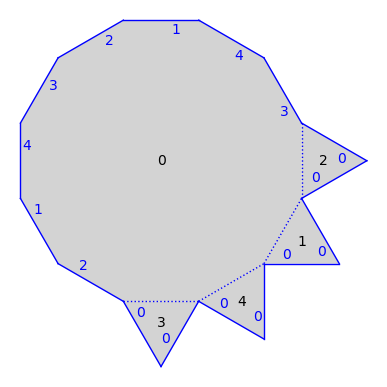

In [26]:
s.plot()

The field containing the vertices:

In [27]:
s.base_ring()

Algebraic Real Field

Computations in the Algebraic Real Field (AA) are slow. It is better to use a NumberField. The following finds the smallest embedding into a NumberField:

In [28]:
ss=s.copy(optimal_number_field=True)

In [29]:
ss.base_ring()

Number Field in a with defining polynomial y^2 - 3 with a = 1.732050807568878?

## Getting a surface from Flipper

<span style="color: red; font-weight: bold; ">This does not work as of SageMath 9.0. Code is commented out below.</span>

<a href="http://flipper.readthedocs.io/en/latest/">Flipper</a> is a program written by Mark Bell which understands mapping classes and can compute the flat structure associated to a pseudo-Anosov mapping class. FlatSurf can import this structure.

This code below requires flipper to be installed. You can do this by running the shell within sage:
<code>sage --sh</code>
Then within the shell execute:
<code>python -m pip install flipper --user --upgrade</code>
More information including pitfalls are described in <a href="http://flipper.readthedocs.io/en/latest/start.html#installation">Flipper's installation instructions</a>.

In [30]:
# import flipper

In [31]:
# T = flipper.load('SB_4')

In [32]:
# h = T.mapping_class('s_0S_1s_2S_3s_1S_2') 

In [33]:
# h.is_pseudo_anosov()

In [34]:
# s = translation_surfaces.from_flipper(h)

The surface s is actually a half translation surface

In [35]:
# type(s)

In [36]:
# s.plot()

## From polyhedra

In [37]:
from flatsurf.geometry.polyhedra import *

In [38]:
polyhedron,s,mapping = platonic_dodecahedron()

The surface $s$ is a Euclidean cone surface.

In [39]:
type(s)

<class 'flatsurf.geometry.cone_surface.ConeSurface'>

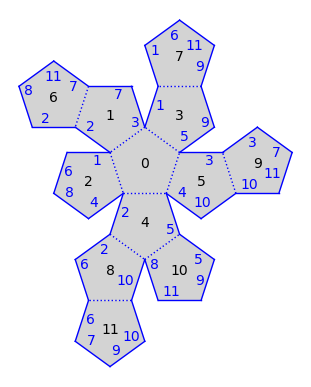

In [40]:
s.plot()

Sage has a built in polyhedron class. You can build a polyhedron as a convex hull of a list of vertices.

In [41]:
polyhedron=Polyhedron([(0,0,0),(1,0,0),(0,1,0),(0,0,1)])

In [42]:
polyhedron.plot()

Graphics3d Object

The following computes the boundary surface as a Euclidean cone surface. It also provides a map from the surface to the polyhedron.

In [43]:
s,mapping = polyhedron_to_cone_surface(polyhedron)

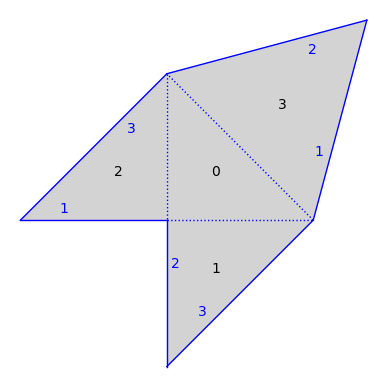

In [44]:
s.plot()

## Defining an infinite surface from scratch

The following demonstrates the implementation of a TranslationSurface. Each geometric structure has an underlying "Surface". The following defines a surface and then uses it to construct a translation surface.

In [45]:
from flatsurf.geometry.surface import Surface

class ParabolaSurface(Surface):
    def __init__(self):
        # The space of polygons with vertices in the rationals:
        self._P = Polygons(QQ)
        
        self._inv = matrix(QQ,[[-1,0],[0,-1]])
        
        # Set the base field to QQ, the base label to be 1, and note that the surface is infinite.
        Surface.__init__(self, QQ, ZZ(1), finite=False)
    
    def polygon(self, label):
        if label not in ZZ:
            raise ValueError("invalid label {!r}".format(lab))
        assert label != 0, "Label should not be zero."
        if label >= 0:
            if label==1:
                return self._P(vertices=[(0,0),(1,1),(-1,1)])
            else:
                return self._P( vertices=[
                    (label-1, (label-1)**2),
                    (label, label**2),
                    (-label, label**2),
                    (-label+1, (label-1)**2) ] )
        else:
            return self._inv*self.polygon(-label)

    def opposite_edge(self, label, e):
        if label not in ZZ:
            raise ValueError("invalid label {!r}".format(lab))
        assert label != 0, "Label should not be zero."

        if label==1 or label==-1:
            if e==1:
                return 2*label,3
            else:
                return -label,e
        else:
            if e==0 or e==2:
                return -label,e
            if e==1:
                if label>0:
                    return label+1,3
                else:
                    return label-1,3
            if e==3:
                if label>0:
                    return label-1,1
                else:
                    return label+1,1

In [46]:
s = TranslationSurface(ParabolaSurface())

In [47]:
TestSuite(s).run(verbose=True, skip="_test_pickling")

running ._test_category() . . . pass
running ._test_edge_matrix() . . . pass
running ._test_new() . . . pass
running ._test_not_implemented_methods() . . . pass
running ._test_underlying_surface() . . .
  running ._test_base_label() . . . pass
  running ._test_base_ring() . . . pass
  running ._test_category() . . . pass
  running ._test_gluings() . . . pass
  running ._test_new() . . . pass
  running ._test_not_implemented_methods() . . . pass
  running ._test_override() . . . pass
  running ._test_polygons() . . . pass
  pass


A graphical surface controls the display of graphical data. For an infinite surface you need to configure the display manually.

In [48]:
gs=s.graphical_surface()

We make six polygons nearest to the polygon with the base label visible.

In [49]:
gs.make_all_visible(limit=6)

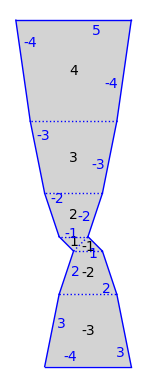

In [50]:
s.plot()